# Data Preparation and Modelling

Have a look at the steps that are followed:
1. Load the data
2. Analyse the data
3. Data Preparation
4. Training
5. Predictions
6. Evaluation

## Load the Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/Iris.csv')

df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Analysis

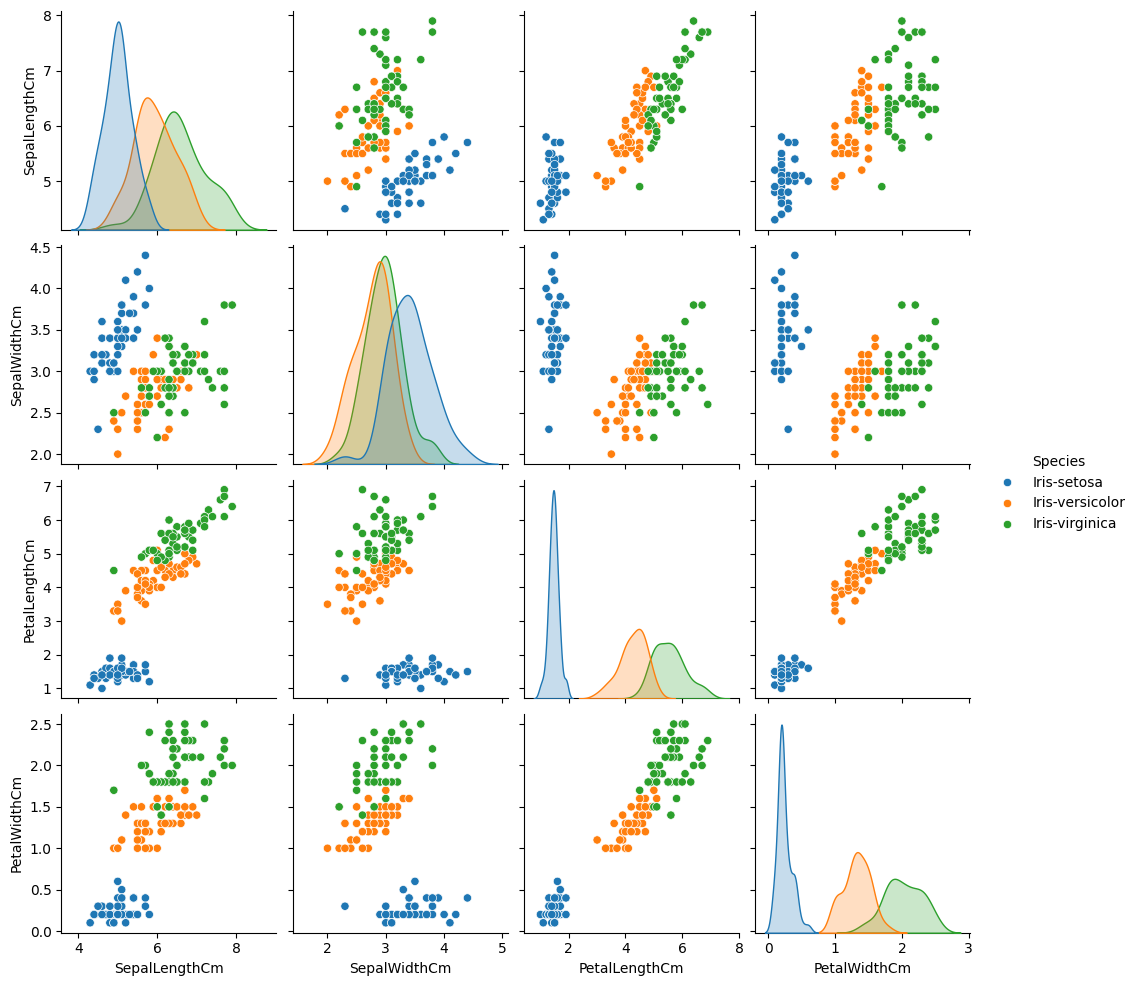

In [4]:
sns.pairplot(df, hue='Species')

<b>Observation</b>

It looks like I don't have to consider all 4 variables to build my model. I can consider either one of the following pair:
1. PetalLength and SepalLength
2. PetalLength and SepalWidth
3. PetalLength and PetalWidth
4. PetalWidth and SepalLength


## Data Preparation and Model Building Pipeline

1. Identifying the inputs (X) and output (y)
2. Split into train and test (X_train, X_test, y_train, y_test)
3. Data Preparation: Data Cleaning and Feature Engineering.
    - Clean the training data
    - Preprocess the training data (X_train_transformed)
4. Training Phase: Build a model
5. Preprocess the test data (X_test_transformed)
6. Predict on unseen data
7. Evaluate the model performance

### Step 1 - Identify Predictors and Target Variables

In [5]:
y = df['Species']
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [6]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [7]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Step 2 - Split the data into train and test

In [8]:
# Split into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(112, 4) (112,)
(38, 4) (38,)


### Step 3 - Data Preparation: Data Cleaning and Feature Engineering

#### **Data Cleaning (Discussed Later)**
- Outliers
- Missing Values
- Duplicates
- Multicollinearity

#### **Feature Engineering**
**For Numerical Data:** When the numerical values of different features span in significantly different ranges or scales, it can impact the performance of certain machine learning algorithms. Some algorithms are sensitive to the scale of the features because they rely on distance measures(like knn or kmeans) or gradient-based optimization(like linear regression, logistic regression, svm, etc...). In such cases, **normalization** or **standardization** is applied to bring all features to a common scale. Features with different magnitudes might have values that are orders of magnitude apart from each other. For example, consider a dataset with two features:
> Feature A (Income): Values range from `$20,000` to `$100,000`.  
> Feature B (Age): Values range from `20` to `60`.

In this case:
> Feature A has a magnitude in the tens of thousands.  
> Feature B has a magnitude in the tens.

| Normalization | Standardization | 
| :---: | :---: |
| Normalization scales the values of a feature to a specific range, usually between 0 and 1. | Standardization transforms the features to have a mean of 0 and a standard deviation of 1. |
| Algorithms that rely on distance measures, such as k-nearest neighbors or clustering algorithms, benefit from normalization. | Algorithms that assume Gaussian-distributed features, like linear regression or support vector machines, often benefit from standardization. |

**`Important Note: It's essential to fit the normalization or standardization parameters (e.g., min, max, mean, and standard deviation) on the training data and apply the same transformation to the test/validation data to maintain consistency..`**


**For Categorical Data:** In order to handle categorical variables in machine learning there are various techniques like **one-hot encoding**, **label encoding**, and **ordinal encoding**. These techniques are used to convert the non-numerical data to numerical representation so that it is easy for Machine Learning algorithms to process the data and extract patterns.

| One-Hot Encoding | Label Encoding |
| :---: | :---: | 
| Converts categorical variables into a binary matrix (1s and 0s).  | Assigns integer values to categories based on a specified order. |
| Applied when the categorical variable is nominal, meaning there is no inherent order among the categories. | When the categorical variable is ordinal, and you want to control the mapping of categories to integer values. |
| Suitable when the number of unique categories is moderate. | Can manageable when the number of categories is high. |
| If the original categorical variable is "Color" with categories {Red, Blue, Green}, one-hot encoding would create three binary columns: IsRed, IsBlue, IsGreen. | If the ordinal variable is "Education Level" with categories {High School, College, Master's, PhD}, and you explicitly specify the order: {High School: 1, College: 2, Master's: 3, PhD: 4}. |

**`Important Note: One-Hot Encoding and Label Encoding is demonstrated in next notebook.`**

Below Feature Engineering for numerical feature is demonstrated.

In [9]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
print(X_train_transformed.shape)

(112, 4)


In [11]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 4
Mean of each column: [5.88660714 3.05178571 3.79642857 1.22232143]
Std of each column: [0.86741565 0.43424445 1.79264014 0.77916047]


### Step 4 - Training Phase: Building the Model

In [12]:
# Import the Algorithm
from sklearn.linear_model import LogisticRegression

# Create an Object
classifier = LogisticRegression()

# Train a model on training data
classifier.fit(X_train_transformed, y_train)

LogisticRegression()

### Step 5 - Preparing Test Data

In [13]:
# Apply transformation on test data 
X_test_transformed = scaler.transform(X_test)

print(X_test_transformed.shape)

(38, 4)


### Step 6 - Prediction on Test Data

In [14]:
# Predicting on test data
y_test_pred = classifier.predict(X_test_transformed)

### Step 7 - Evaluation of Model's Performance

In [15]:
# Import metrics from sklearn
from sklearn import metrics

# Calculate accuracy score
metrics.accuracy_score(y_test, y_test_pred)

0.9736842105263158

## Training - KNN Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

0.9736842105263158

## Training - DT Classifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

0.9736842105263158

## Training - Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

metrics.accuracy_score(y_test, y_test_pred)

0.9736842105263158